# Importing the dataset and Libraries

Python envirnoment comes with many useful libaries which contains several pre complied codes that make programming more user friendly

In [1]:
import pandas as pd
import numpy as np 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
print("setup complete")

setup complete


We will first import our CSV files using pandas. 
Here we have two seperate files for training our model and testing our trained model


In [2]:
T_test = pd.read_csv(r"C:\Users\ankit\Documents\T3\test.csv", low_memory=False)
T_train = pd.read_csv(r"C:\Users\ankit\Documents\T3\train.csv", low_memory=False)

In [3]:
T_test.head


<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0 

In [4]:
T_train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

We are creating a copy and storing the passenger id column which will later be used for output submission

In [5]:
old_test=T_test.copy()

In [6]:
idPass = old_test.iloc[:,0]

we will drop unnecessary columns as they act as noise to our data 

In [7]:
T_train = T_train.drop(["PassengerId", "Name","Ticket","Cabin"], axis=1)
T_test = T_test.drop(["PassengerId", "Name","Ticket","Cabin"], axis=1)

# Data Visualization

<AxesSubplot:title={'center':'Sex Ratio of Travellers'}, xlabel='Sex', ylabel='count'>

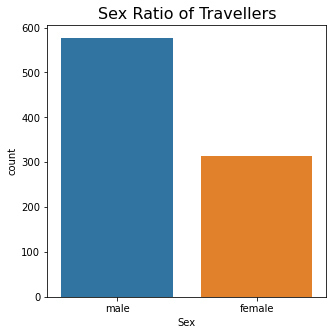

In [8]:
plt.figure(figsize=(5,5))
plt.title("Sex Ratio of Travellers", size = 16)
sns.countplot(x = T_train['Sex'])




Most of the travellers are male

Text(0, 0.5, 'Frequency')

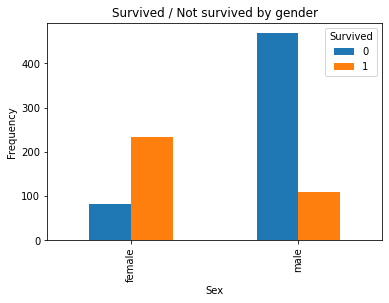

In [9]:
%matplotlib inline
pd.crosstab(T_train.Sex,T_train.Survived).plot(kind='bar')
plt.title('Survived / Not survived by gender')
plt.xlabel('Sex')
plt.ylabel('Frequency')

Whether survived or not by gender,
we can observe that most of the females made it alive but only a part of males survived

<AxesSubplot:title={'center':'Number of passengers in each Ticket-Class'}, xlabel='Pclass', ylabel='count'>

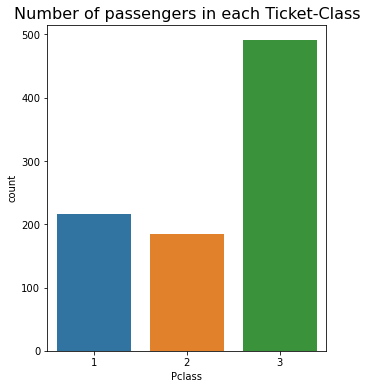

In [10]:
plt.figure(figsize=(5,6))
plt.title("Number of passengers in each Ticket-Class", size = 16)
sns.countplot(x = T_train['Pclass'])


Total number of passengers in each class

Text(0, 0.5, 'Frequency')

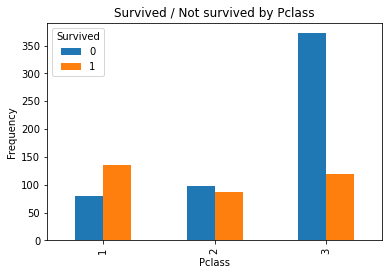

In [11]:
%matplotlib inline
pd.crosstab(T_train.Pclass,T_train.Survived).plot(kind='bar')
plt.title('Survived / Not survived by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

First class has highest percentage of survivability which indicates they were alloted with safest place on the ship

<AxesSubplot:title={'center':'Age group'}, xlabel='Age', ylabel='Count'>

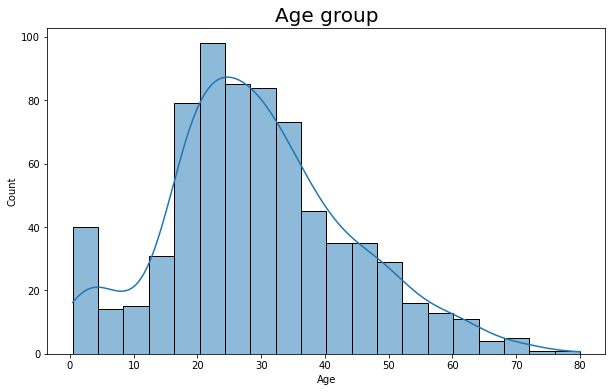

In [12]:
plt.figure(figsize=(10,6))
plt.title("Age group" , size =20)
sns.histplot(x = T_train['Age'], kde = True)

people between the ages 20 - 30 account to a major part in total number of passengers

<AxesSubplot:title={'center':'Number of passengers  based on embarkation'}, xlabel='Embarked', ylabel='count'>

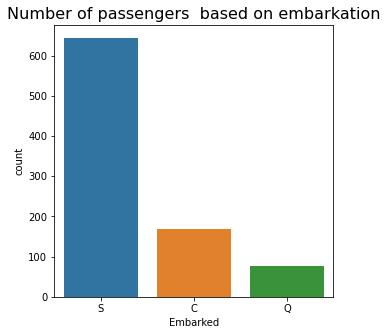

In [13]:
plt.figure(figsize=(5,5))
plt.title("Number of passengers  based on embarkation", size = 16)
sns.countplot(x = T_train['Embarked'])


Text(0, 0.5, 'Frequency')

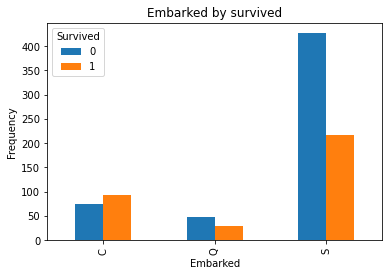

In [14]:
%matplotlib inline
pd.crosstab(T_train.Embarked,T_train.Survived).plot(kind='bar')
plt.title('Embarked by survived')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

S Embarkment has most survivors 

<AxesSubplot:>

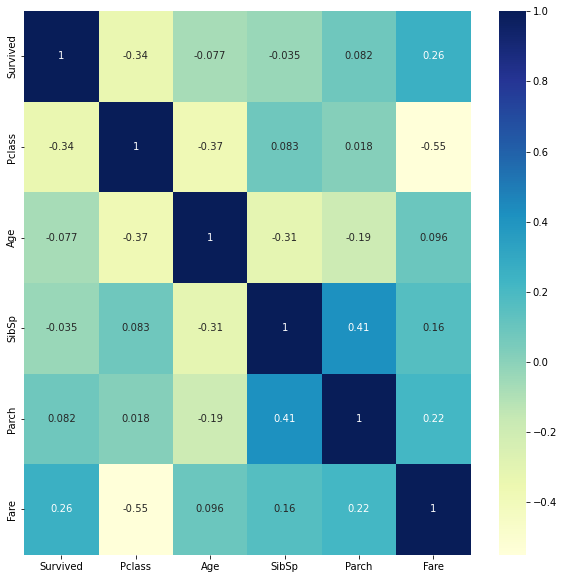

In [15]:
correlation = T_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap="YlGnBu")

No two features have reasonable co relation, so we continue with the same set of features

Now let us evaluate the number of missing values in each column 

In [16]:
missing_values_count = T_test.isnull().sum()
missing_values_count[0:10]

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [17]:
missing_values_count = T_train.isnull().sum()
missing_values_count[0:10]

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We will fill the missing values of Embarked column with 'S' as 'S' is most frequent element

In [18]:
T_train = T_train.fillna({'Embarked': 'S'})

Generally fare will be based on ticket class So, grouping both by mean values

In [19]:
T_test.groupby('Pclass')['Fare'].mean()


Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

Now finding the missing fare value and replacing it with mean of its respective class

In [20]:
T_test[T_test.Fare.isna()]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [21]:
T_test = T_test.fillna({'Fare': 12.459678})

Replacing missing age values with mean

In [22]:
T_train['Age'] = T_train['Age'].fillna(T_train['Age'].mean())
T_test['Age'] = T_test['Age'].fillna(T_test['Age'].mean())

# Pre-processing

Converting categorial variable (Sex) into numerical using  label encoder

In [23]:
lbl=LabelEncoder()
categorical=['Sex']
for i in categorical:
 T_train[i]=lbl.fit_transform(T_train[i])
T_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [24]:
lbl=LabelEncoder()
categorical=['Sex']
for i in categorical:
 T_test[i]=lbl.fit_transform(T_test[i])
T_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


Converting Embarked feature into numerical using dummies function

In [25]:
Em = T_train[['Embarked']]
cat_list = pd.get_dummies(Em)
df=T_train.join(cat_list)
data_vars=df.columns.values.tolist()

In [26]:
Emt = T_test[['Embarked']]
cats_list = pd.get_dummies(Emt)
dft=T_test.join(cats_list)
data_vars=dft.columns.values.tolist()

In [27]:
df = df.drop(["Embarked"], axis = 1)
dft = dft.drop(["Embarked"], axis = 1)

# Final Model

X - all features except 'survived'                                                                                              
y - survived (dependent variable)                                                                                                
X_test - features from test data set

In [28]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]
X_test = dft.iloc[:, 0:]

using standard scaler to scale the data set

In [29]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_test = scaler.fit_transform(X_test)

In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error

# Random Forests

In [31]:
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=5,random_state=100)
random_forest.fit(X_std, y)
y_pred = random_forest.predict(X_std_test)

To submit the predictions, we create a data frame with passenger id and predicitons and the convert the data frame to csv file to sumbit on kaggle

In [23]:
submission = pd.DataFrame({'PassengerId':idPass, 'Survived': y_pred})

submission.to_csv('T3_3.csv', index=False)


We as a team tried different methods and different combinations and the best rank achieved was 855/14000

9000 rank  - logistic regression + standard scaler                                                                              
4211 rank    - robust scaler + random forests                                                                                   
2193 rank   - KNN imputation + random forests + Standard Scaler                                                                
855 rank    - standard scaler + random forests (missing values filled with mean)
